In [1]:
import numpy as np
import emcee
import astropy.units as u
import pandas as pd

# Test fit of model generate dwith simulation 11 in the test set

In [2]:
backendfilename = 'backend2_fitid11_wrms_allp_tune_corr_new_fixedslopeflaringcorr_uncx10_zeus.h5'
name = backendfilename.split('.')[0]
n_walkers=70
id=11

In [3]:
val_params = pd.read_csv('../selected_val.csv', index_col=0)

In [4]:
val_params.loc[id]

InvStokes1      204.173794
Alpha             0.003890
AspectRatio       0.082150
FlaringIndex      0.169750
PlanetMass        0.002265
SigmaSlope        0.839500
nx              600.000000
rout              3.000000
ny              193.000000
maxder1500       23.952070
Name: 11, dtype: float64

In [5]:
!pip install zeus-mcmc


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
import h5py
import zeus

with h5py.File(backendfilename, 'r') as f:
    chain = f['samples'][:]  # or the correct dataset name
    print(chain.shape)

(101, 70, 6)


In [7]:

chain = chain.reshape(-1,6)
chain2 = np.concatenate([chain, (chain[:,3]).reshape(-1,1)], axis=1)
chain = chain2[:, [0,1,2,6,3,4,5]]

/home/aleruzza/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


NameError: name 'target_params' is not defined

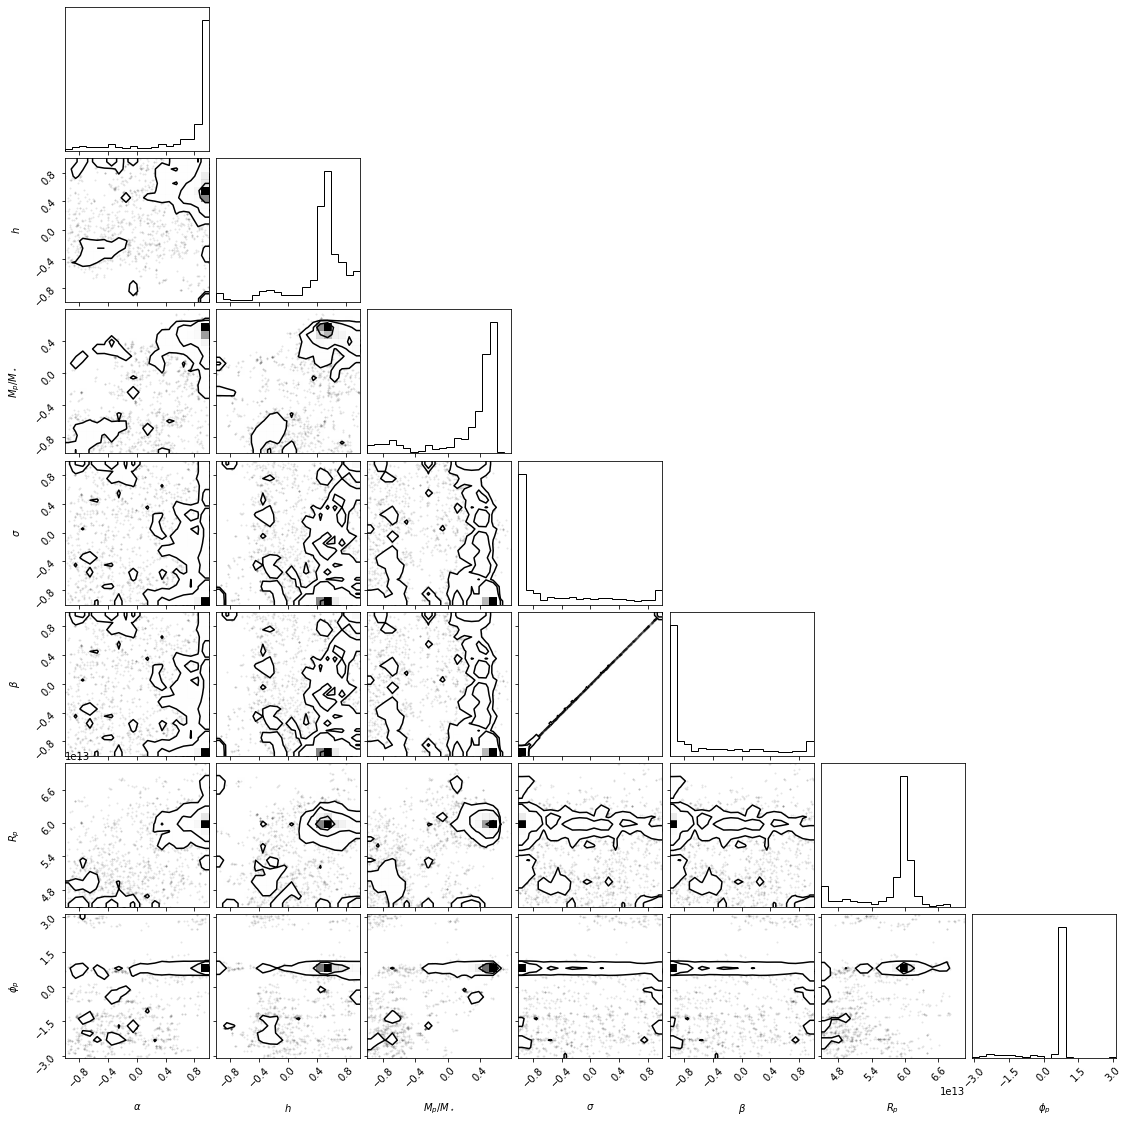

In [8]:
from corner import corner
import matplotlib.pyplot as plt
labels = ['$\\alpha$', '$h$', '$M_p/M_\\star$', '$\sigma$', '$\\beta$', '$R_p$', '$\phi_p$']
means = chain.reshape(-1,7).mean(axis=0)
stds = chain.reshape(-1,7).std(axis=0)
figure = corner(chain, labels=labels, fontsize=17)


# Extract the axes
axes = np.array(figure.axes).reshape((7,7))

# Loop over the diagonal
for i in range(7):
    ax = axes[i, i]
    ax.axvline(target_params[i], color="g")
    ax.set_xlim(par_ranges[i])
    ax.set_title(f'{labels[i]}:\n {means[i]:.2} $\pm$ {stds[i]:.2}', fontsize=17)

# Loop over the histograms
for yi in range(7):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(target_params[xi], color="g")
        ax.axhline(target_params[yi], color="g")
        ax.plot(target_params[xi], target_params[yi], "sg")
        
text = ''
for i, l in enumerate(labels):
    text = text + f'\t  {l}:  {target_params[i]:.2}\n'
axes[0,6].text(-0.5,-0.2,f'―■― Target values\n\n{text}', fontsize=20, color='g')
#plt.gcf().set_size_inches(7,7)
plt.savefig(f'{name}.png', dpi=500, bbox_inches='tight')

In [9]:
import matplotlib.pyplot as plt

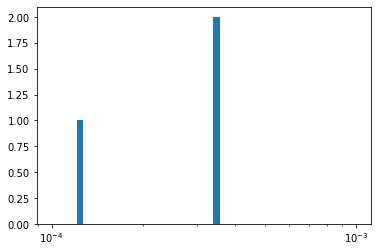

In [10]:
plt.hist(chain.reshape(-1), bins=np.logspace(-4,-3, 50))
plt.xscale('log')

# Acceptance rate

In [11]:
chain = chain.reshape(-1,n_walkers,7)
print(f'Acceptance rate: {reader.accepted.sum()/(chain.shape[0]*chain.shape[1])*100:.2f} %')

NameError: name 'reader' is not defined

In [12]:
chain[:, 1,0]

array([0.61395245, 0.71671815, 0.62639721, 0.93769945, 0.95556469,
       0.89968247, 0.64037907, 0.63981675, 0.6323326 , 0.86167783,
       0.88182605, 0.94301441, 0.94318901, 0.49106135, 0.61739229,
       0.5808254 , 0.5918895 , 0.82558691, 0.69323375, 0.66986207,
       0.68935889, 0.83869802, 0.8488911 , 0.8912662 , 0.96550632,
       0.8222884 , 0.99838794, 0.99980597, 0.8794885 , 0.90039681,
       0.87395453, 0.8741621 , 0.88827859, 0.87433469, 0.87392121,
       0.8780155 , 0.90182516, 0.89555765, 0.98236107, 0.96907089,
       0.97132651, 0.92371824, 0.9228454 , 0.9222936 , 0.9218487 ,
       0.88927649, 0.89015306, 0.88282286, 0.88234967, 0.87804334,
       0.86666732, 0.87240348, 0.89499876, 0.91831825, 0.92193535,
       0.93435328, 0.93442978, 0.90127839, 0.90125641, 0.90126883,
       0.89711063, 0.91375075, 0.90932413, 0.90510462, 0.90512748,
       0.90631791, 0.90753545, 0.89681657, 0.89988107, 0.90470834,
       0.89869181, 0.90115883, 0.9025059 , 0.90257691, 0.92094

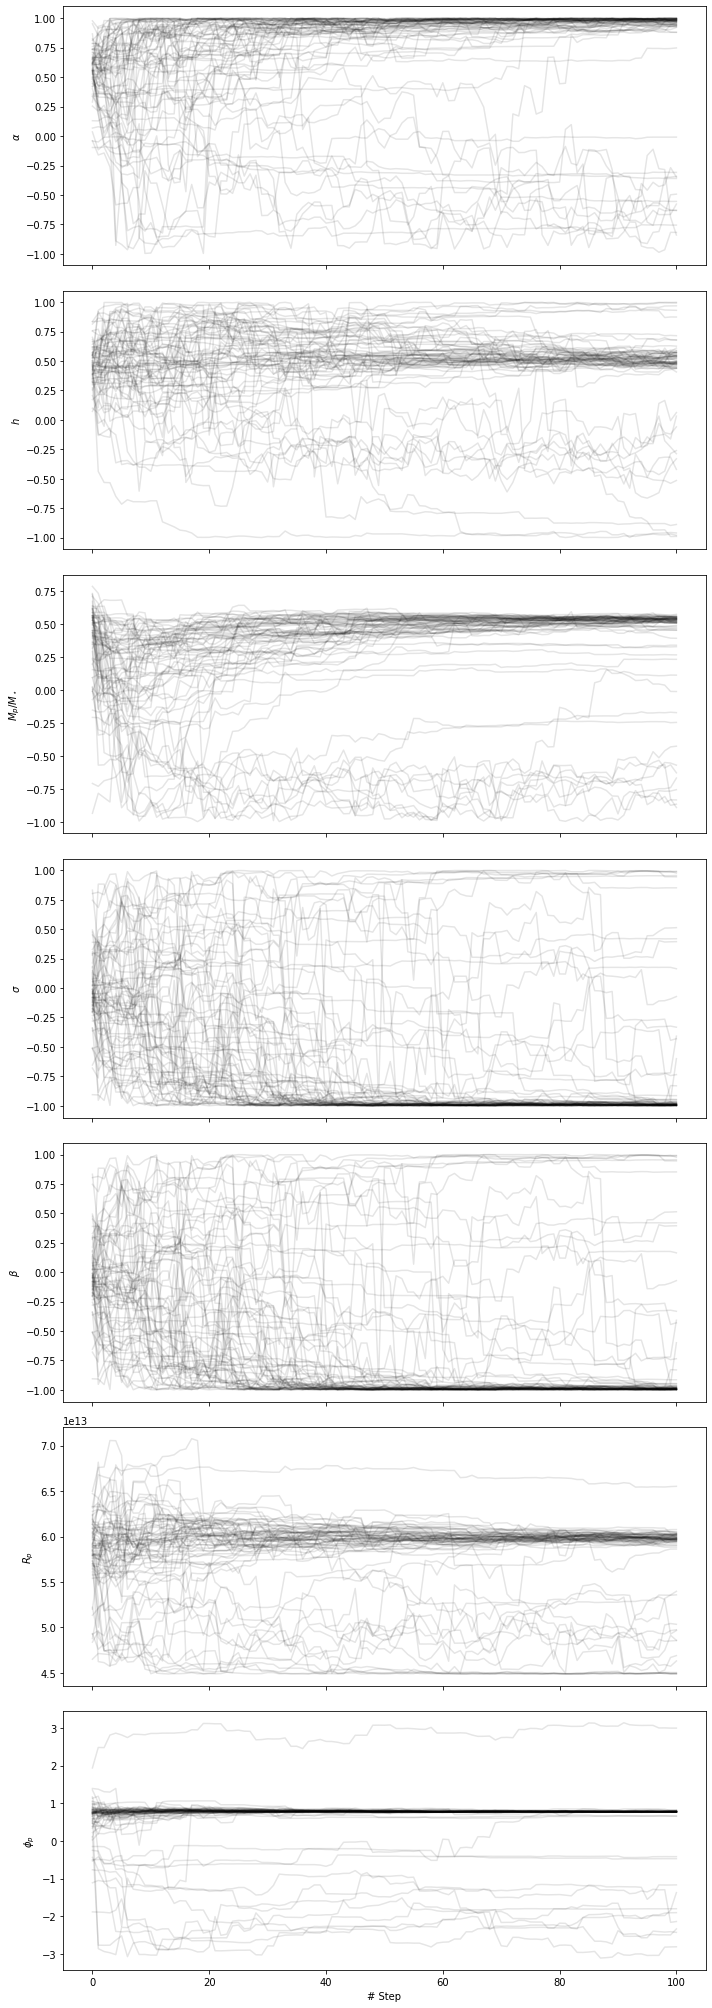

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(7, 1, figsize=(10,4*7), sharex=True)

for i in range(7):
    axs[i].plot(chain[:,:,i], color='black', alpha=0.1)
    axs[i].set_ylabel(labels[i])
    #axs[i].axhline(target_params[i], color='g')
axs[-1].set_xlabel('# Step')
fig.tight_layout()
plt.savefig(f'{name}_chain.png', bbox_inches='tight', dpi=500)

# Likelihood

In [22]:
plt.plot(-reader.get_log_prob()[:,:])
plt.yscale('log')
#plt.ylim(4.2e4,4.205e4)
#plt.xlim(125,2000)

AttributeError: You must run the sampler with 'store == True' before accessing the results

In [23]:
likelihood = -reader.get_log_prob().reshape(-1)

AttributeError: You must run the sampler with 'store == True' before accessing the results

In [24]:
chain_flat = chain.reshape(-1,7)

NameError: name 'likelihood' is not defined

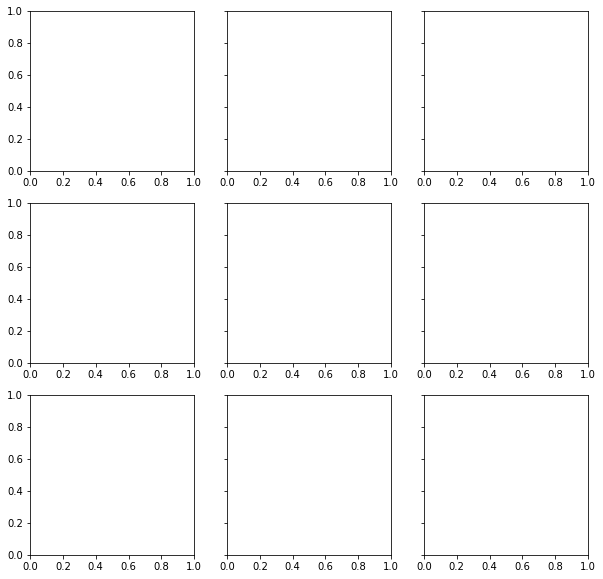

In [25]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharey=True)

for i, ax, in enumerate(axs.flatten()):
    
    if i < 7:
        ax.scatter(chain_flat[:,i], likelihood, marker='.', c=np.log10(np.arange(len(likelihood))))
        ax.set_yscale('log')
        ax.set_ylim(4.195e4, 4.24e4)
        ax.set_xlabel(labels[i])
    else:
        ax.axis('off')
        
    if i%3==0:
        ax.set_ylabel('-log $L$')
        
plt.tight_layout()
plt.savefig(f'{name}_logL.png', bbox_inches='tight', dpi=500)
